# ¡Hola, Hernan!  

Mi nombre es David Bautista, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

# Comentario General #4

Hola, Hernán, te felicito por la culminación del proyecto. Muy ben trabajo.  </div>

# DESCRIPCION DEL PROYECTO

# Como analista para Zuber, una empresa nueva de viajes compartidos que se está lanzando en Chicago, debo encontrar patrones en la información disponible para comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

# La idea es trabajar con bases de datos distintas, analizando los datos de los competidores y probar una hipótesis sobre el impacto del clima en la frecuencia de los viajes en un determinado dia.

# Paso 1. Escribe un código para analizar los datos sobre el clima en Chicago en noviembre de 2017 desde el sitio web:

https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html

# Paso 2. Análisis exploratorio de datos

# 1.Imprime el campo company_name. Encuentra la cantidad de viajes en taxi para cada compañía de taxis para el 15 y 16 de noviembre de 2017, asigna al campo resultante el nombre trips_amount e imprímelo también. Ordena los resultados por el campo trips_amount en orden descendente.

```sql
SELECT 
    cabs.company_name AS company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM 
    cabs
    INNER JOIN trips ON trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-15' AND '2017-11-16'
GROUP BY 
    company_name
ORDER BY 
    trips_amount DESC;

# 2.Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

```sql
SELECT
    cabs.company_name as company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM
    cabs
INNER JOIN
    trips
ON
    trips.cab_id = cabs.cab_id
WHERE
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
    AND cabs.company_name LIKE '%%Yellow%%'
GROUP BY company_name
UNION ALL
SELECT
    cabs.company_name as company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM
    cabs
INNER JOIN
    trips
ON
    trips.cab_id = cabs.cab_id
WHERE
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
    AND cabs.company_name LIKE '%%Blue%%'
GROUP BY company_name;

# 3.Del 1 al 7 de noviembre de 2017, las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Asigna el nombre company al campo con nombres de empresas de taxis. Ordena el resultado en orden descendente por trips_amount.

```sql
SELECT
    CASE 
        WHEN company_name = 'Flash Cab' THEN 'Flash Cab' 
        WHEN company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services' 
        ELSE 'Other' 
    END AS company,
    COUNT(trips.trip_id) as trips_amount                
FROM 
    cabs
INNER JOIN 
    trips 
ON 
    trips.cab_id = cabs.cab_id
WHERE 
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
GROUP BY 
    company
ORDER BY 
    trips_amount DESC;

# Paso 3. Prueba la hipótesis de que la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

# 4.Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.

```sql
SELECT
    neighborhood_id,
    name
FROM 
    neighborhoods
WHERE 
    name LIKE '%Hare' OR name LIKE 'Loop';

# 5.Para cada hora recupera los registros de condiciones meteorológicas de la tabla weather_records. Usando el operador CASE, divide todas las horas en dos grupos: Bad si el campo description contiene las palabras rain o storm, y Good para los demás. Nombra el campo resultante weather_conditions. La tabla final debe incluir dos campos: fecha y hora (ts) y weather_conditions.

```sql
SELECT
    ts,
    CASE
        WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions
FROM 
    weather_records;

# 6.Recupera de la tabla de trips todos los viajes que comenzaron en el Loop (pickup_location_id: 50) el sábado y terminaron en O'Hare (dropoff_location_id: 63). Obtén las condiciones climáticas para cada viaje. Utiliza el método que aplicaste en la tarea anterior. Recupera también la duración de cada viaje. Ignora los viajes para los que no hay datos disponibles sobre las condiciones climáticas.

# Las columnas de la tabla deben estar en el siguiente orden:

# start_ts
# weather_conditions
# duration_seconds
# Ordena por trip_id.

```sql
SELECT
    start_ts,
    T.weather_conditions,
    duration_seconds
FROM 
    trips
INNER JOIN (
    SELECT
        ts,
        CASE
            WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
            ELSE 'Good'
        END AS weather_conditions
    FROM 
        weather_records          
) T on T.ts = trips.start_ts
WHERE 
    pickup_location_id = 50 AND dropoff_location_id = 63 AND EXTRACT (DOW from trips.start_ts) = 6
ORDER BY trip_id;

# Paso 4. Análisis exploratorio de datos

# Importar librerias

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
from scipy.stats import levene

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, Hernan. Buen trabajo importando las librerías necesarias para el desarrollo del proyecto. 
</div>

# Importar y Cargar datos

In [2]:
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo cargando los datasets principales para el desarrollo del proyecto. 
</div>

# Estudiar los datos que contienen

In [3]:
df_companies.info()
df_companies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [4]:
df_companies.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [5]:
df_neighborhoods.info()
df_neighborhoods.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [6]:
df_neighborhoods.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo usando los métodos ``info()``, ``descrbie()`` y ``head()`` para poder explorar de manera inicial el contenido de los datasets. 
</div>

# Identificar los 10 principales barrios en términos de finalización del recorrido

In [7]:
top_10_average_trip = df_neighborhoods.sort_values(by='average_trips', ascending=False) 

top_10_average_trip_1 = top_10_average_trip.head(10)

print(top_10_average_trip_1)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo estructurando la tabla. 
</div>

# Hacer gráficos: Los 10 barrios principales por número de finalizaciones

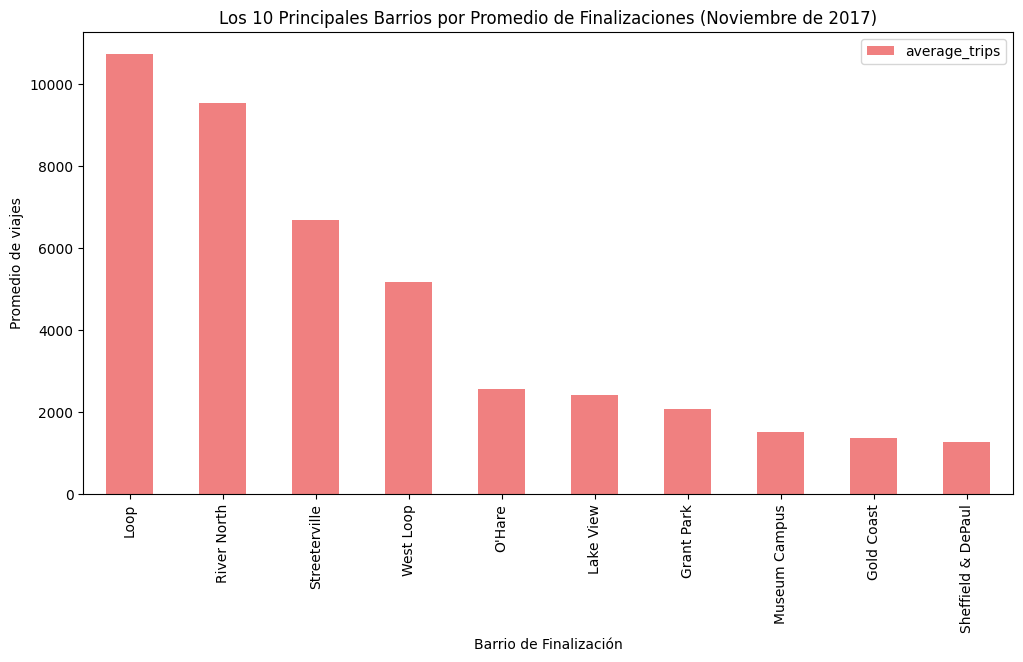

In [8]:
top_10_average_trip_1.plot(kind='bar',
                           figsize=(12, 6),
                           title='Los 10 Principales Barrios por Promedio de Finalizaciones (Noviembre de 2017)',
                           xlabel='Barrio de Finalización',
                           ylabel='Promedio de viajes',
                           color='lightcoral',
                           rot=90,
                           x='dropoff_location_name',
                           y='average_trips')

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo desplegando el barplot para estudiar el top de los principales barrios con más promedio de finalizaciones de viaje.  
</div>

# Empresas de taxis y número de viajes

In [9]:
top_10_companies = df_companies.sort_values(by='trips_amount', ascending=False).head(10)

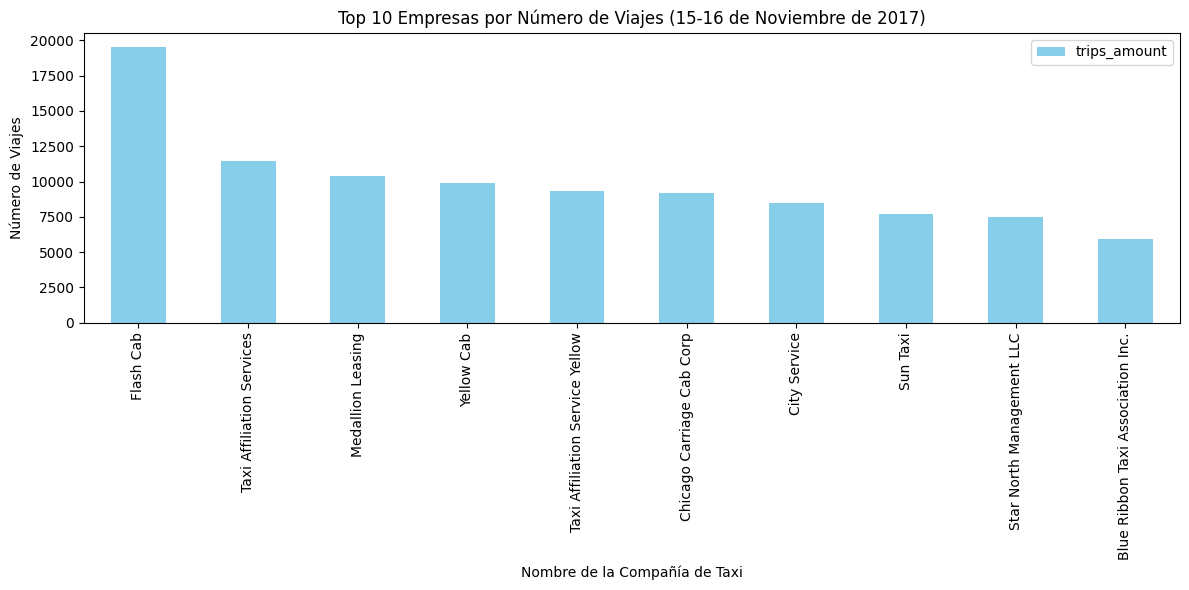

In [10]:
top_10_companies.plot(kind='bar',
                      figsize=(12, 6),
                      title='Top 10 Empresas por Número de Viajes (15-16 de Noviembre de 2017)',
                      xlabel='Nombre de la Compañía de Taxi',
                      ylabel='Número de Viajes',
                      color='skyblue',
                      rot=90,
                      x='company_name',
                      y='trips_amount')

plt.tight_layout()
plt.show()

# Sacar conclusiones basadas en cada gráfico y explicar los resultados

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
El análisis de "top_10_average_trip_1" revela que 'Loop' se destaca como el más popular y al examinar "top_10_companies" se observa que Flash Cab lidera significativamente el mercado; Ahora bien, si estos dos análisis se centran en diferentes aspectos del mercado de viajes compartidos, se puede decir que Flash Cab como empresa lider, probablemente realiza un gran volumen de viajes hacia los destinos más populares como el 'Loop', dada su mayor actividad general, sea la que sea. Sin embargo, sin datos directos para poder cruzar esta premisa de la compañía y el destino a nivel de viaje individual, seguira siendo una inferencia; Por otro lado la  ya marcada diferencia en el volumen de viajes entre Flash Cab y sus competidores en el top 10 sugiere una distribución desigual de la cuota de mercado entre los principales actores, paralelamente, la concentración de finalizaciones en ciertos barrios clave como 'Loop' indica áreas de alta demanda que todas las compañías deberian atender, pero una vez mas para comprender este fenomeno, sería interesante analizar cómo la cuota de mercado de las diferentes compañías varía entre los distintos barrios y si existen tal vez especificaciones geográficas o de destino por parte de algunas empresas para su funcionamiento. 
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

~~Buen trabajo desplegando el gráfico y realizando tus observaciones; sin embargo, sería interesante poder limitar las observaciones únicamente al top 10 para obtener un mejor esquema.~~ 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>

Perfecto, buen trabajo con la modificación. 
</div>

# Paso 5. Prueba de hipótesis (Python)

# Importar y cargar datos

In [11]:
df_trips_Loop_AI_OHare = pd.read_csv('/datasets/project_sql_result_07.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo cargando el dataset con información del clima. 
</div>

# Estudiar los datos que contienen

In [12]:
df_trips_Loop_AI_OHare.info()
df_trips_Loop_AI_OHare.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [13]:
df_trips_Loop_AI_OHare.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo explorando de manera inicial el contenido del dataset.
</div>

# Verificar que los tipos de datos sean correctos

In [14]:
df_trips_Loop_AI_OHare['start_ts'] = pd.to_datetime(df_trips_Loop_AI_OHare['start_ts'])
print(df_trips_Loop_AI_OHare['start_ts'].head())
print(df_trips_Loop_AI_OHare['start_ts'].dtype)

0   2017-11-25 16:00:00
1   2017-11-25 14:00:00
2   2017-11-25 12:00:00
3   2017-11-04 10:00:00
4   2017-11-11 07:00:00
Name: start_ts, dtype: datetime64[ns]
datetime64[ns]


In [15]:
df_trips_Loop_AI_OHare['day_of_week'] = df_trips_Loop_AI_OHare['start_ts'].dt.day_name()
print(df_trips_Loop_AI_OHare['day_of_week'].head())

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: day_of_week, dtype: object


In [16]:
saturday_trips = df_trips_Loop_AI_OHare[df_trips_Loop_AI_OHare['day_of_week'] == 'Saturday']

saturday_good_weather = saturday_trips[saturday_trips['weather_conditions'] == 'Good']['duration_seconds']
saturday_bad_weather = saturday_trips[saturday_trips['weather_conditions'] == 'Bad']['duration_seconds']

print(saturday_good_weather.describe())
print(saturday_bad_weather.describe())

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64
count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64


# Prueba la hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [17]:
levene_stat, levene_p_value = levene(saturday_good_weather, saturday_bad_weather)

print('Estadístico de Levene:', levene_stat)
print('Valor p de Levene:', levene_p_value)

alpha_levene = 0.05

if levene_p_value < alpha_levene:
    print("\nSe rechaza la hipótesis nula de la prueba de Levene.")
    print("Se evidencia que las varianzas de ambos grupos son significativamente diferentes.")
else:
    print("\nNo se rechaza la hipótesis nula de la prueba de Levene.")
    print("No se evidencia que las varianzas de ambos grupos sean significativamente diferentes.")

Estadístico de Levene: 0.38853489683656073
Valor p de Levene: 0.5332038671974493

No se rechaza la hipótesis nula de la prueba de Levene.
No se evidencia que las varianzas de ambos grupos sean significativamente diferentes.


In [18]:
results = st.ttest_ind(saturday_good_weather, saturday_bad_weather)

print('valor p:', results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia estadísticamente significativa en la duración promedio de los viajes los sábados lluviosos.")
else:
    print("No rechazamos la hipótesis nula. No hay una diferencia estadísticamente significativa en la duración promedio de los viajes los sábados lluviosos.")

valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula. Hay una diferencia estadísticamente significativa en la duración promedio de los viajes los sábados lluviosos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>

Perfecto, buen trabajo desarrollando la prueba.
</div>

# Explica: cómo planteaste las hipótesis nula y alternativa / qué criterio usaste para probar las hipótesis y por qué?

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
El planteamiento de la hipótesis nula "Hay una diferencia estadísticamente significativa en la duración promedio de los viajes los sábados lluviosos" y la hipótesis alternativa "No hay una diferencia estadísticamente significativa en la duración promedio de los viajes los sábados lluviosos" nace de Filtrar el DataFrame para obtener solo los viajes de los sábados que son los que nos interesan, asi como tambien crear dos subconjuntos de datos, por un lado uno para los sábados con buen clima y otro para los sábados con mal clima (saturday_good_weather, saturday_bad_weather), realizo una prueba Levene, la cual sugiere que podemos proceder con la interpretación de los resultados de nuestra prueba t estándar sin preocuparnos demasiado en que los resultados de las varianzas sean iguales, despues aplico la prueba t student a la columna que nos muestra la duracion en segundos de estos dos subconjuntos (duration_seconds) de estos dos subconjuntos y seguido a esto comparo el valor p resultante con la significación estandar (α=0.05 ya probada con levene()) para decidir si rechazamos o no la hipótesis nula; Esto significa entonces como CONCLUSION FINAL, que segun el resultado de salida (6.52e-12, extremadamente pequeño comparado con alfa!), que tenemos evidencia estadística para decir que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados ES SIGNIFICATIVAMENTE DIFERENTE cuando las condiciones climáticas son malas (lluviosas) en comparación a cuando son buenas. Y si bien es cierto, una interpretación interesante seria enfocarse en ver como la precaución del conductor y la reducción de la velocidad en general como una posible causa es un buen punto de partida lógico para una nueva hipótesis plausible que explicaría el aumento en la duración promedio, obviamente la magnitud de la diferencia promedio en segundos y reconocer que la correlación no implica causalidad, podrian existir otros factores que afectarian de manera significativa en segundos los resultados y que podria ser una posibilidad en detalle para un proximo analisis, segun las metricas estadisticas tambien mostradas en ambos grupos de ineteres. 
</div>